In [1]:
# !pip install pykan
!pip install pykan

In [2]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.MLP import MLP as kan_MLP
from kan.feynman import get_feynman_dataset

In [3]:
torch.cuda.is_available()

False

In [4]:
class MLP(kan_MLP):

    def __init__(self, width, act='silu', save_act=True, seed=0, device='cpu'):
        super(MLP, self).__init__()
        
        torch.manual_seed(seed)
        
        linears = []
        self.width = width
        self.depth = depth = len(width) - 1
        for i in range(depth):
            linears.append(torch.nn.Linear(width[i], width[i+1]))
        self.linears = torch.nn.ModuleList(linears)
        
        if act == 'silu':
            self.act_fun = torch.nn.SiLU()
        elif act == 'relu':
            self.act_fun = torch.nn.ReLU()
        elif act == 'tanh':
            self.act_fun = torch.nn.Tanh()
        
        self.save_act = save_act
        self.acts = None
        
        self.cache_data = None
        
        self.device = device
        self.to(device)

## Tests with dataset I.6.20

### Initial testing

Dataset I.6.20 generated.
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 3.47e-04 | test_loss: 3.85e-04 | reg: 7.98e+00 | : 100%|█| 200/200 [00:57<00:00,  3.47


saving model version 0.1
Grid: 3, Train RMSE: 3.4709e-04, Test RMSE: 3.8522e-04
saving model version 0.2
Training grid: 5


| train_loss: 2.16e-04 | test_loss: 2.39e-04 | reg: 7.60e+00 | : 100%|█| 200/200 [00:30<00:00,  6.53


saving model version 0.3
Grid: 5, Train RMSE: 2.1574e-04, Test RMSE: 2.3851e-04
saving model version 0.4
Training grid: 10


| train_loss: 1.50e-04 | test_loss: 1.74e-04 | reg: 7.46e+00 | : 100%|█| 200/200 [00:44<00:00,  4.49


saving model version 0.5
Grid: 10, Train RMSE: 1.5002e-04, Test RMSE: 1.7404e-04
saving model version 0.6
Training grid: 20


| train_loss: 6.49e-05 | test_loss: 1.04e-04 | reg: 9.16e+00 | : 100%|█| 200/200 [01:29<00:00,  2.24


saving model version 0.7
Grid: 20, Train RMSE: 6.4931e-05, Test RMSE: 1.0375e-04
saving model version 0.8
Training grid: 50


| train_loss: 4.39e-03 | test_loss: 1.99e-02 | reg: 8.48e+00 | : 100%|█| 200/200 [01:40<00:00,  1.99


saving model version 0.9
Grid: 50, Train RMSE: 4.3857e-03, Test RMSE: 1.9942e-02
saving model version 0.10
Training grid: 100


| train_loss: 1.88e-03 | test_loss: 2.21e-02 | reg: 8.49e+00 | : 100%|█| 200/200 [02:58<00:00,  1.12


saving model version 0.11
Grid: 100, Train RMSE: 1.8837e-03, Test RMSE: 2.2141e-02
saving model version 0.12
Training grid: 200


| train_loss: 1.52e-03 | test_loss: 2.60e-02 | reg: 8.51e+00 | : 100%|█| 200/200 [05:55<00:00,  1.78


saving model version 0.13
Grid: 200, Train RMSE: 1.5168e-03, Test RMSE: 2.5986e-02


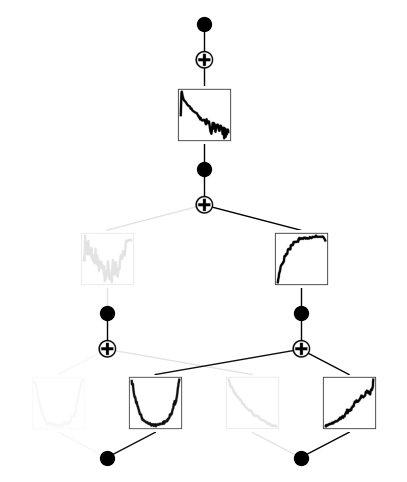

In [ ]:
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

model = KAN(width=[len(ranges), 2, 1, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 2.09e-03 | test_loss: 2.11e-03 | reg: 8.52e+00 | : 100%|█| 200/200 [06:35<00:00,  1.98


saving model version 0.1
Grid: 3, Train RMSE: 2.0906e-03, Test RMSE: 2.1050e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.16e-03 | test_loss: 1.17e-03 | reg: 8.45e+00 | : 100%|█| 200/200 [07:08<00:00,  2.14


saving model version 0.3
Grid: 5, Train RMSE: 1.1561e-03, Test RMSE: 1.1689e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.70e-04 | test_loss: 4.82e-04 | reg: 7.86e+00 | : 100%|█| 200/200 [08:37<00:00,  2.59


saving model version 0.5
Grid: 10, Train RMSE: 4.7036e-04, Test RMSE: 4.8189e-04
saving model version 0.6
Training grid: 20


| train_loss: 3.25e-04 | test_loss: 3.38e-04 | reg: 7.84e+00 | : 100%|█| 200/200 [11:14<00:00,  3.37


saving model version 0.7
Grid: 20, Train RMSE: 3.2534e-04, Test RMSE: 3.3790e-04
saving model version 0.8
Training grid: 50


| train_loss: 2.44e-04 | test_loss: 2.53e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [20:01<00:00,  6.01


saving model version 0.9
Grid: 50, Train RMSE: 2.4385e-04, Test RMSE: 2.5270e-04
saving model version 0.10
Training grid: 100


| train_loss: 2.38e-04 | test_loss: 2.51e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [15:52<00:00,  4.76


saving model version 0.11
Grid: 100, Train RMSE: 2.3789e-04, Test RMSE: 2.5056e-04
saving model version 0.12
Training grid: 200


| train_loss: 2.31e-04 | test_loss: 2.56e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [28:40<00:00,  8.60


saving model version 0.13
Grid: 200, Train RMSE: 2.3127e-04, Test RMSE: 2.5642e-04


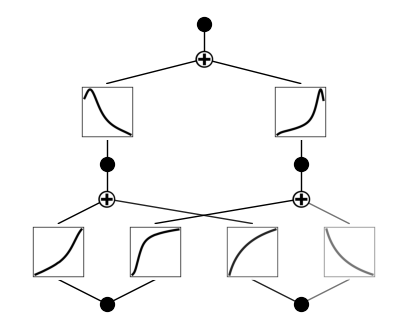

In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=15000, test_num=15000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Dataset moved to CUDA.
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 1.69e-03 | test_loss: 1.68e-03 | reg: 8.37e+00 | : 100%|█| 200/200 [00:46<00:00,  4.34


saving model version 0.1
Grid: 3, Train RMSE: 1.6873e-03, Test RMSE: 1.6785e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.32e-03 | test_loss: 1.38e-03 | reg: 8.48e+00 | : 100%|█| 200/200 [00:44<00:00,  4.54


saving model version 0.3
Grid: 5, Train RMSE: 1.3249e-03, Test RMSE: 1.3831e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.60e-04 | test_loss: 4.99e-04 | reg: 8.41e+00 | : 100%|█| 200/200 [00:35<00:00,  5.68


saving model version 0.5
Grid: 10, Train RMSE: 4.6021e-04, Test RMSE: 4.9874e-04
saving model version 0.6
Training grid: 20


| train_loss: 2.25e-04 | test_loss: 3.25e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:24<00:00,  8.07


saving model version 0.7
Grid: 20, Train RMSE: 2.2455e-04, Test RMSE: 3.2521e-04
saving model version 0.8
Training grid: 50


| train_loss: 1.16e-04 | test_loss: 2.74e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:29<00:00,  6.74


saving model version 0.9
Grid: 50, Train RMSE: 1.1637e-04, Test RMSE: 2.7409e-04
saving model version 0.10
Training grid: 100


| train_loss: 8.90e-05 | test_loss: 2.84e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:20<00:00,  9.65


saving model version 0.11
Grid: 100, Train RMSE: 8.9032e-05, Test RMSE: 2.8356e-04
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:41<00:00,  4.79it/s]


saving model version 0.13
Grid: 200, Train RMSE: nan, Test RMSE: nan


ValueError: alpha (nan) is outside 0-1 range

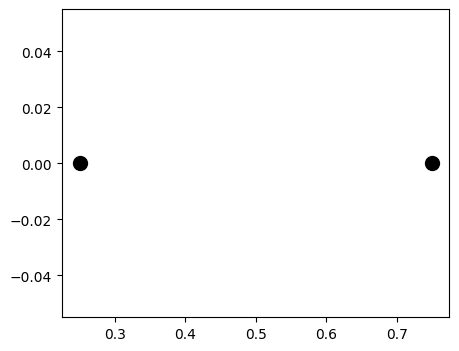

In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)
model.to('cuda')
dataset['train_input'] = dataset['train_input'].to('cuda')
dataset['train_label'] = dataset['train_label'].to('cuda')
dataset['test_input'] = dataset['test_input'].to('cuda')
dataset['test_label'] = dataset['test_label'].to('cuda')
print("Dataset moved to CUDA.")


# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

### Testing prunning

Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



saving model version 0.5
Grid: 10, Train RMSE: 1.7039e-02, Test RMSE: 2.1186e-02
saving model version 0.6
Training grid: 20


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:12<00:00,  7.88



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



saving model version 0.5
Grid: 10, Train RMSE: 1.7039e-02, Test RMSE: 2.1186e-02
saving model version 0.6
Training grid: 20


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:12<00:00,  7.88



saving model version 0.7
Grid: 20, Train RMSE: 1.6985e-02, Test RMSE: 2.1156e-02


Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



saving model version 0.5
Grid: 10, Train RMSE: 1.7039e-02, Test RMSE: 2.1186e-02
saving model version 0.6
Training grid: 20


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:12<00:00,  7.88



saving model version 0.7
Grid: 20, Train RMSE: 1.6985e-02, Test RMSE: 2.1156e-02


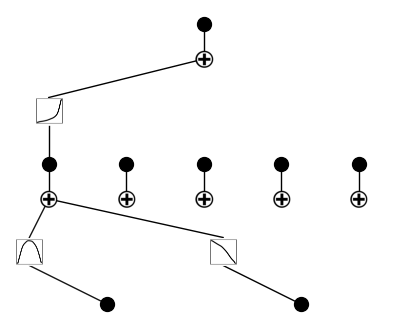

In [48]:
seed = 171
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
print(f"Dataset symbols: {symbol}")
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=500, test_num=500, seed=seed)


# 3. Initialize KAN Model with coarse grid G=3
width = [len(ranges), 5, 1]
model = KAN(width=width, grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20]
steps_per_grid = 100
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=1e-3)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

In [ ]:
model = model.prune

In [49]:
model.plot()

{'test_loss': 0.02115623466670513, 'n_edge': 15, 'n_grid': 20}

In [ ]:
model.evaluate(dataset)

{'test_loss': 0.30853909254074097, 'n_edge': 6, 'n_grid': 20}

In [ ]:
model.fit(dataset, opt="LBFGS", steps=100)

| train_loss: 8.41e-02 | test_loss: 1.20e-01 | reg: 8.30e+00 | : 100%|█| 100/100 [00:32<00:00,  3.10

saving model version 0.11


{'train_loss': [array(0.2881325, dtype=float32),
  array(0.28688082, dtype=float32),
  array(0.2862275, dtype=float32),
  array(0.28579137, dtype=float32),
  array(0.2855391, dtype=float32),
  array(0.25307894, dtype=float32),
  array(0.24682917, dtype=float32),
  array(0.23696461, dtype=float32),
  array(0.22966692, dtype=float32),
  array(0.22567141, dtype=float32),
  array(0.16169867, dtype=float32),
  array(0.14484866, dtype=float32),
  array(0.13796763, dtype=float32),
  array(0.1341562, dtype=float32),
  array(0.125745, dtype=float32),
  array(0.13489938, dtype=float32),
  array(0.12330223, dtype=float32),
  array(0.11722546, dtype=float32),
  array(0.11517485, dtype=float32),
  array(0.11190354, dtype=float32),
  array(0.11484651, dtype=float32),
  array(0.11253449, dtype=float32),
  array(0.10906837, dtype=float32),
  array(0.10679381, dtype=float32),
  array(0.10518655, dtype=float32),
  array(0.10493144, dtype=float32),
  array(0.10341242, dtype=float32),
  array(0.10283092, 

### Test MLP model

In [ ]:
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=30)

In [ ]:
model = new_MLP(width=[2, 5, 5, 5, 5, 1], act='tanh', seed=30, device='cpu')
results = model.fit(dataset, steps=600, opt="LBFGS")

| train_loss: 6.31e-04 | test_loss: 6.54e-04 | reg: 7.54e+01 | : 100%|█| 600/600 [00:27<00:00, 21.91


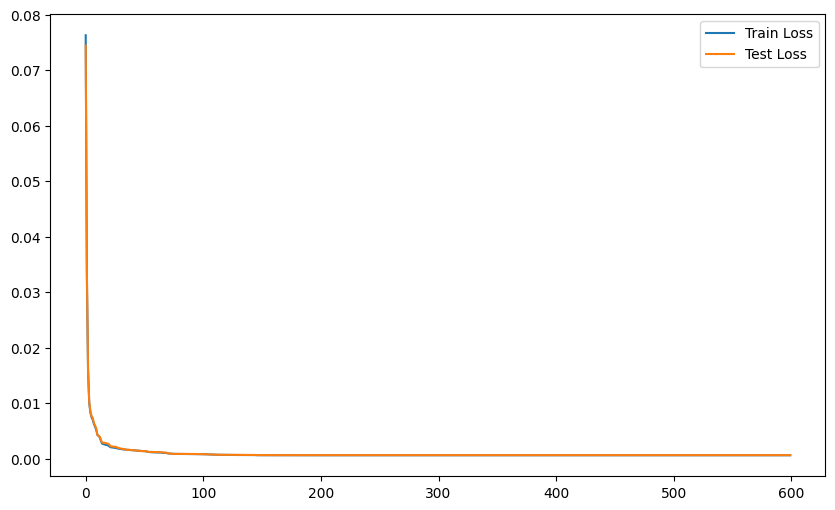

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results['train_loss'], label='Train Loss')
plt.plot(results['test_loss'], label='Test Loss')
plt.legend()
plt.show()

## Experiment Functions

In [95]:
def run_kan_feynman(dataset: str,
                          shape: list[int],
                          samples: int, # samples for both train and test (separated) sets
                          start_grid: int = 3,
                          k: int = 3,
                          device='cuda' if torch.cuda.is_available() else 'cpu',
                          seed:int=42,
                          grids=[3, 5, 10, 20, 50, 100, 200],
                          steps_per_grid=200,
                          plot_model=False,
                          prune=False,
                          prune_threshold=1e-2,
                          steps_after_prune=200,
                          lamb=0.00,
                          opt="LBFGS"):
    
    assert device in ['cpu', 'cuda']
    try:
        torch.manual_seed(seed)
    except Exception as e:
        print('Warning: could not set torch.manual_seed')
    
    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
    except ValueError:
        raise ValueError("Invalid dataset name")

    dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=samples, test_num=samples, seed=seed)


    dataset['train_input'] = dataset['train_input'].to(device)
    dataset['train_label'] = dataset['train_label'].to(device)
    dataset['test_input'] = dataset['test_input'].to(device)
    dataset['test_label'] = dataset['test_label'].to(device)

    # assert shape[0] == len(ranges), "Input dimension does not match number of variables in dataset"
    # print(shape)
    if not shape[-1] == 1:
        print(f"Warning: Output dimension {shape[-1]} is not 1. Forcing condition.")
        shape[-1] = 1
    if not shape[0] == len(ranges):
        print(f"Warning: Input dimension {shape[0]} does not match number of variables in dataset {len(ranges)}. Forcing condition.")
        shape[0] = len(ranges)

    # Create a copy of shape before passing to KAN to avoid mutation
    # KAN's __init__ converts [2,5,1] to [[2,0],[5,0],[1,0]] in-place
    model = KAN(width=shape.copy(), grid=start_grid, k=k, seed=seed).to(device)

    per_grid_results = {}

    for i, g in enumerate(grids):
        if i > 0: #skip first iteration
            model = model.refine(g)
        
        print(f"Training grid: {g}")
        results = model.fit(dataset, opt=opt, steps=steps_per_grid, lamb=lamb) #, verbose=verbose)
        per_grid_results[g] = results

    if prune:
        print("Pruning model...")
        model = model.prune(prune_threshold)
        # Disable grid updates after pruning to avoid numerical instability with smaller network
        results = model.fit(dataset, opt=opt, steps=steps_after_prune, lamb=0.0, update_grid=False) #, verbose=verbose)
        per_grid_results['prunning'] = results
        

    if plot_model:
        model.plot()
        plt.show()

    best_test_rmse = min(per_grid_results.values(), key=lambda x: x['test_loss'][-1])['test_loss'][-1]
    
    return model, per_grid_results, best_test_rmse

In [85]:
def sweep_kan_feynman(dataset:str, width: int=5, depths=[2,3,4,5,6], seeds: list[int] = [42, 171, 3], lambs: list[float] = [0.0], **kwargs):

    all_results = {}
    best_test_rmse = float('inf')
    
    # Get dataset info to determine input dimension
    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
        n_inputs = len(ranges)
    except Exception as e:
        raise ValueError(f"Could not load dataset {dataset}")

    for depth in depths:
        all_results[depth] = {}
        for lamb in lambs:
            all_results[depth][lamb] = {}
            for seed in seeds:
                all_results[depth][lamb][seed] = {}
                # Build shape with correct input dimension and output dimension of 1
                # depth includes input and output layers, so we need depth-2 hidden layers
                if depth == 1:
                    shape = [n_inputs, 1]
                else:
                    shape = [n_inputs] + [width for _ in range(depth - 2)] + [1]


                model, per_grid_results, test_rmse = run_kan_feynman(dataset=dataset, shape=shape, **kwargs)
                    
                all_results[depth][lamb][seed] = {
                    'model': model,
                    'per_grid_results': per_grid_results,
                    'test_rmse': test_rmse
                }

                if test_rmse < best_test_rmse:
                    best_test_rmse = test_rmse


            return all_results, best_test_rmse

In [96]:
def feynman_human_kan_experiment(dataset: str, shape: list[int], seeds: int| list[int] = [42, 171, 3], samples: int = 1000, **kwargs):
    """
    Run feynman dataset experiment with human-constructed KAN
    """
    all_results = []
    for seed in seeds:
        results = run_kan_feynman(dataset=dataset,
                                seed=seed,
                                samples=samples,
                                shape=shape,
                                **kwargs)
        all_results.append(results)
    
    best_test_rmse = min([res[2] for res in all_results])

    print('==='*20)
    print(f'Best Test RMSE for human-constructed KAN on dataset {dataset}: {best_test_rmse:.4e}')

    return best_test_rmse, all_results
    

def feunman_not_pruned_kan_experiment(dataset: str, seeds: int | list[int], samples=1000, **kwargs):

    results = sweep_kan_feynman(dataset=dataset,
                                seeds=seeds,
                                samples=samples,
                                **kwargs)

    # print('==='*20)
    # print(f'Best Test RMSE for not pruned KAN on dataset {dataset}: {results[1]:.4e}')
    best_test_rmse = results[1]

    return best_test_rmse, results


def feynman_pruned_kan_experiment(dataset: str, seeds: int|list[int] = [42, 171, 3], samples: int = 1000, steps_after_prune: int = 100,  lamb=1e-2, **kwargs):
    """
    Run feynman dataset experiment with pruned KAN
    """
    results, best_test_rmse = sweep_kan_feynman(dataset=dataset,
                                seeds=seeds,
                                samples=samples,
                                prune=True,
                                prune_threshold=0.01,
                                steps_after_prune=steps_after_prune,
                                lamb=lamb,
                                **kwargs)
    

    # get smallest shape with loss < 1e-2
    # get shape of best loss

    smallest_shape = float('inf')
    smallest_params = float('inf')
    shape_best_loss = None
    smallest_loss = float('inf')

    for depth, v in results.items():
        for lamb, vv in v.items():
            for seed, res in vv.items():
                test_rmse = res['test_rmse']
                model = res['model']
                shape = sum([p[0] for p in model.width])
                num_params = sum(p.numel() for p in model.parameters())


                if test_rmse < 1e-2 and shape < smallest_shape:
                    if num_params > smallest_params:
                        print(f"Warning: Found smaller shape {shape} with more parameters {num_params} > {smallest_params}. Still taking smallest shape though.")
                    smallest_shape = shape
                    smallest_params = num_params

                if test_rmse < smallest_loss:
                    smallest_loss = test_rmse
                    shape_best_loss = shape


    best_test_rmse = min(best_test_rmse, smallest_loss) # should be the same...

    return smallest_shape, shape_best_loss, best_test_rmse, results


In [100]:
def feynman_mlp_experiment(dataset: str, seeds: int|list[int] = [42, 171, 3], samples: int = 1000, device='cuda' if torch.cuda.is_available() else 'cpu',
                           activations=['silu', 'relu', 'tanh'], depths = [2,3,4,5,6], steps=1400, lr=1, **kwargs):
    """
    Run feynman dataset experiment with MLP
    """

    assert device in ['cpu', 'cuda']

    all_results = {}
    best_test_rmse = float('inf')

    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
    except ValueError:
        raise ValueError("Invalid dataset name")
    
    for seed in seeds:
        try:
            torch.manual_seed(seed)
        except Exception as e:
            print(f"Warning: could not set seed due to error: {e}")

        dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=samples, test_num=samples, seed=seed)
        dataset['train_input'] = dataset['train_input'].to(device)
        dataset['train_label'] = dataset['train_label'].to(device)
        dataset['test_input'] = dataset['test_input'].to(device)
        dataset['test_label'] = dataset['test_label'].to(device)

        all_results[seed] = {}
        
        for depth in depths:
            shape = [len(ranges)] + [5 for _ in range(depth-2)] + [1]

            all_results[seed][depth] = {}

            for act in activations:
                model = MLP(width=shape, act=act, seed=seed, device=device)

                results = model.fit(dataset=dataset, steps=steps, opt="LBFGS", lr=lr)
                all_results[seed][depth][act] = results

                test_rmse = min(results['test_loss'])

                if test_rmse < best_test_rmse:
                    best_test_rmse = test_rmse
                
    return all_results, best_test_rmse

In [101]:
def full_feynman_experiment(dataset: str, shape_human: list[int], seeds: list[int] = [42, 171, 3], samples: int = 1000, **kwargs):
    """
    Run full feynman dataset experiment with human-constructed KAN, not pruned KAN, pruned KAN, and MLP
    """

    # print('Running Human-constructed KAN Experiment...')
    # h_best_test_rmse, h_results = feynman_human_kan_experiment(dataset=dataset, shape=shape_human, seeds=seeds, samples=samples, **kwargs)

    print()
    print('Running Not Pruned KAN Experiment...')
    not_pruned_best_rmse, not_pruned_results = feunman_not_pruned_kan_experiment(dataset=dataset, seeds=seeds, samples=samples, **kwargs)

    print() 
    print('Running Pruned KAN Experiment...')
    pruned_smallest_shape, pruned_shape_best_loss, pruned_best_rmse, pruned_results = feynman_pruned_kan_experiment(dataset=dataset, seeds=seeds, samples=samples, **kwargs)

    print()
    print('Running MLP Experiment...')
    mlp_results, mlp_best_rmse = feynman_mlp_experiment(dataset=dataset, seeds=seeds, samples=samples, **kwargs)

    print()
    print('==='*40)
    print('==='*40)
    print(f'Final Results for dataset {dataset}:')
    print(f'Pruned KAN Smallest Shape: {pruned_smallest_shape}, ')
    print(f'Pruned KAN lowest loss Shape: {pruned_shape_best_loss}, ')
    print(f'Pruned KAN lowest loss: {pruned_best_rmse:.4e}')
    print(f'Human-constructed KAN loss: {h_best_test_rmse:.4e}')
    print(f'UnPruned KAN lowest loss: {not_pruned_best_rmse:.4e}')
    print(f'MLP lowest loss: {mlp_best_rmse:.4e}')
    print('==='*40)
    print('==='*40)

In [102]:
full_feynman_experiment(dataset='I.6.20', shape_human=[2, 5, 1], samples=400, grids=[3, 5])


Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 4.66e-02 | test_loss: 5.04e-02 | reg: 2.06e+00 | : 100%|█| 200/200 [00:06<00:00, 32.58


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 4.63e-02 | test_loss: 5.03e-02 | reg: 2.07e+00 | : 100%|█| 200/200 [00:06<00:00, 33.26


saving model version 0.3
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 4.66e-02 | test_loss: 5.04e-02 | reg: 2.06e+00 | : 100%|█| 200/200 [00:07<00:00, 25.83


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 4.63e-02 | test_loss: 5.03e-02 | reg: 2.07e+00 | : 100%|█| 200/200 [00:06<00:00, 30.01


saving model version 0.3
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 4.66e-02 | test_loss: 5.04e-02 | reg: 2.06e+00 | : 100%|█| 200/200 [00:06<00:00, 30.21


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 4.63e-02 | test_loss: 5.03e-02 | reg: 2.07e+00 | : 100%|█| 200/200 [00:05<00:00, 35.48


saving model version 0.3

Running Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.01e-01 | test_loss: 9.77e-02 | reg: 1.17e-03 | : 100%|█| 200/200 [00:11<00:00, 18.14


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.01e-01 | test_loss: 9.77e-02 | reg: 2.59e-04 | : 100%|█| 200/200 [00:08<00:00, 23.98


saving model version 0.3
Pruning model...
saving model version 0.4


| train_loss: 9.15e-02 | test_loss: 8.92e-02 | reg: 7.92e-01 | : 100%|█| 100/100 [00:03<00:00, 25.83


saving model version 0.5
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.01e-01 | test_loss: 9.77e-02 | reg: 1.17e-03 | : 100%|█| 200/200 [00:12<00:00, 16.12


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.01e-01 | test_loss: 9.77e-02 | reg: 2.63e-04 | : 100%|█| 200/200 [00:08<00:00, 23.36


saving model version 0.3
Pruning model...
saving model version 0.4


| train_loss: 9.15e-02 | test_loss: 8.92e-02 | reg: 7.92e-01 | : 100%|█| 100/100 [00:04<00:00, 22.28


saving model version 0.5
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.01e-01 | test_loss: 9.76e-02 | reg: 1.17e-03 | : 100%|█| 200/200 [00:09<00:00, 20.79


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.01e-01 | test_loss: 9.77e-02 | reg: 2.66e-04 | : 100%|█| 200/200 [00:08<00:00, 23.12


saving model version 0.3
Pruning model...
saving model version 0.4


| train_loss: 9.14e-02 | test_loss: 8.92e-02 | reg: 7.94e-01 | : 100%|█| 100/100 [00:04<00:00, 24.19


saving model version 0.5

Running MLP Experiment...


TypeError: MLP.__init__() missing 1 required positional argument: 'width'

## Experiments

In [ ]:
# results, best_rmse = feynman_mlp_experiment(dataset='I.6.20', seeds=[42, 171, 3], samples=1000, device='cpu')

| train_loss: 7.22e-02 | test_loss: 7.17e-02 | reg: 1.46e+00 | : 100%|█| 1400/1400 [00:28<00:00, 49.
| train_loss: 7.22e-02 | test_loss: 7.17e-02 | reg: 1.46e+00 | : 100%|█| 1400/1400 [00:28<00:00, 48.
| train_loss: 7.22e-02 | test_loss: 7.17e-02 | reg: 1.46e+00 | : 100%|█| 1400/1400 [00:28<00:00, 49.
| train_loss: 1.32e-02 | test_loss: 1.32e-02 | reg: 2.86e+01 | : 100%|█| 1400/1400 [00:38<00:00, 36.
| train_loss: 1.31e-02 | test_loss: 1.31e-02 | reg: 2.82e+01 | : 100%|█| 1400/1400 [00:43<00:00, 32.
| train_loss: 1.30e-02 | test_loss: 1.30e-02 | reg: 2.72e+01 | : 100%|█| 1400/1400 [00:37<00:00, 37.
| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████| 1400/1400 [01:49<00:00, 12.76it/s]
| train_loss: 1.19e-03 | test_loss: 1.32e-03 | reg: 4.99e+01 | : 100%|█| 1400/1400 [00:51<00:00, 27.
| train_loss: 1.12e-03 | test_loss: 1.18e-03 | reg: 4.92e+01 | : 100%|█| 1400/1400 [00:57<00:00, 24.
| train_loss: 5.56e-04 | test_loss: 7.10e-04 | reg: 7.33e+01 | : 100%|█| 1400/1400 [00:51<0

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


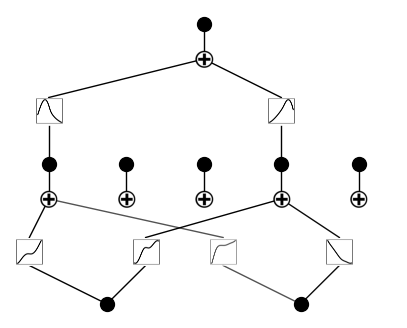

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


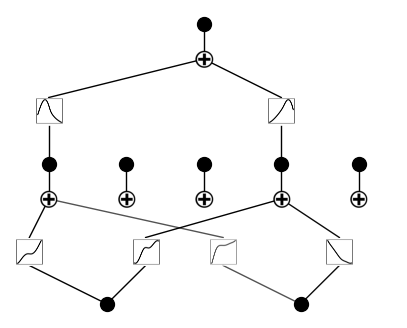

saving model version 0.4


checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


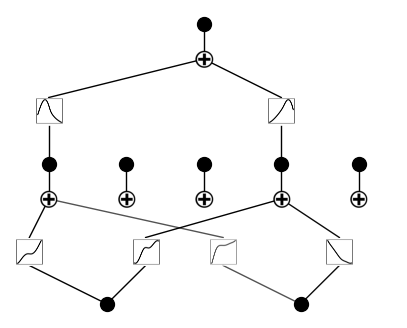

saving model version 0.4


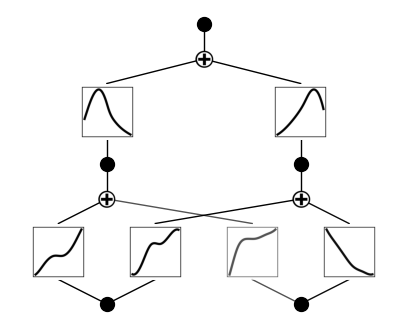

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


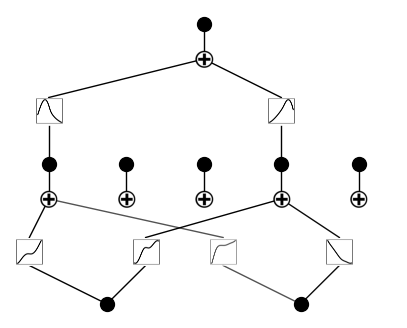

saving model version 0.4


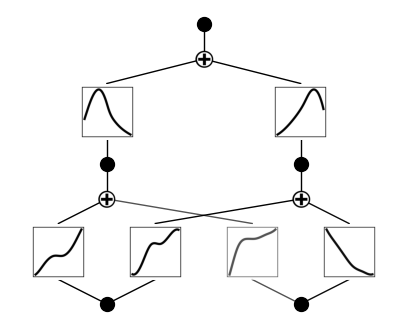

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


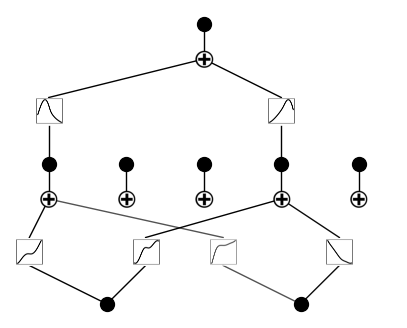

saving model version 0.4


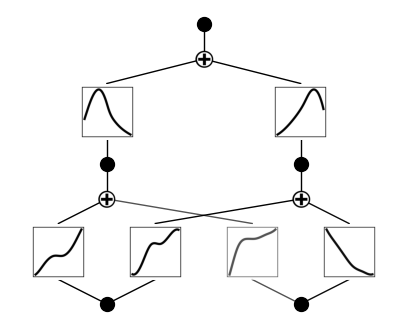

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


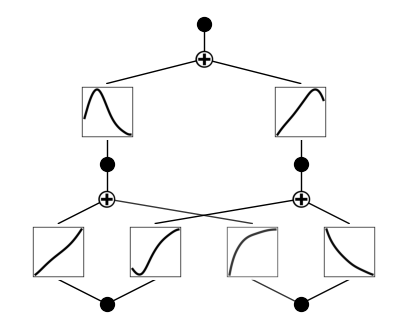

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


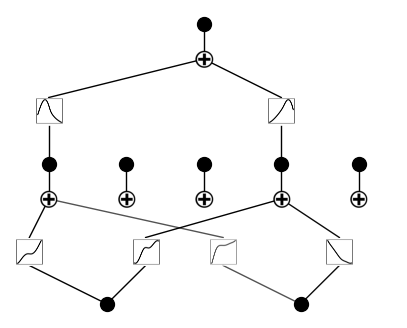

saving model version 0.4


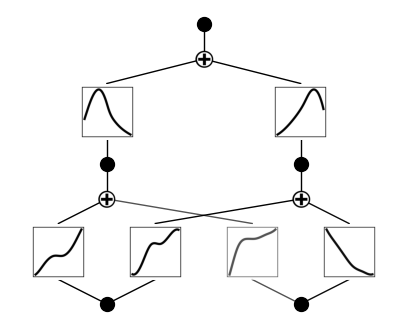

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


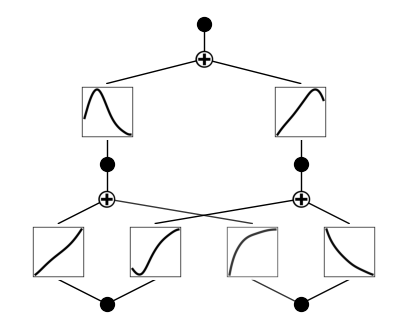

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.20e-02 | reg: 2.66e+00 | : 100%|█| 50/50 [00:23<00:00,  2.15it



checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


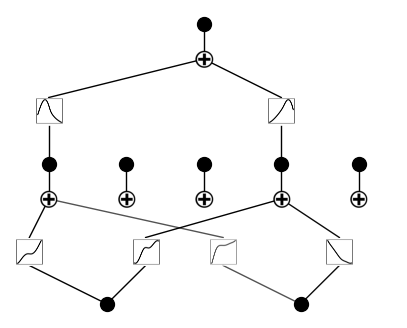

saving model version 0.4


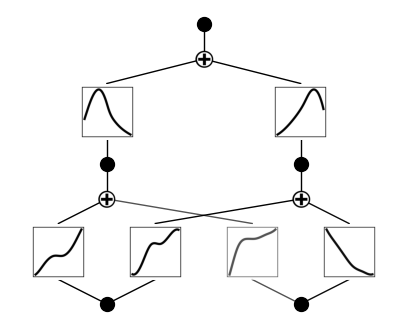

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


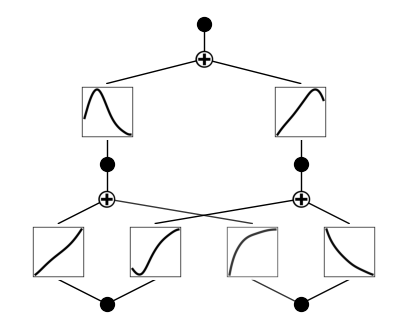

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.20e-02 | reg: 2.66e+00 | : 100%|█| 50/50 [00:23<00:00,  2.15it



saving model version 0.3
Pruning model...


checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


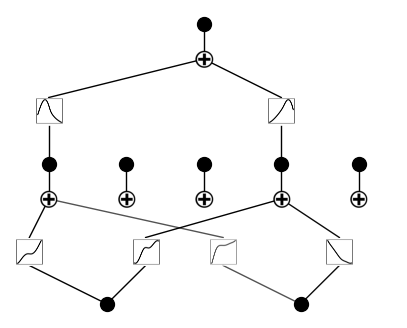

saving model version 0.4


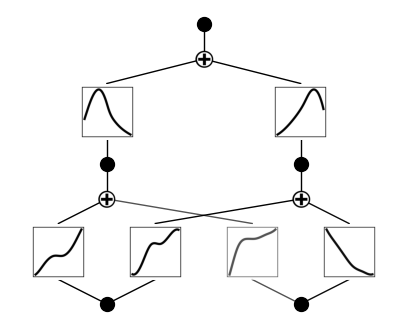

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


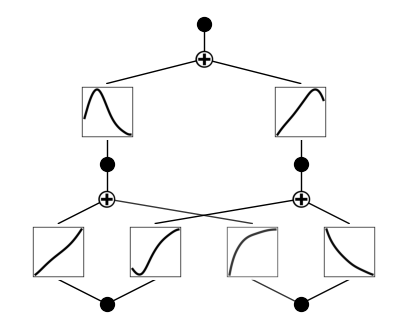

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.20e-02 | reg: 2.66e+00 | : 100%|█| 50/50 [00:23<00:00,  2.15it



saving model version 0.3
Pruning model...


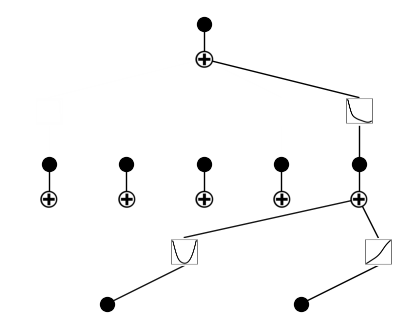

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


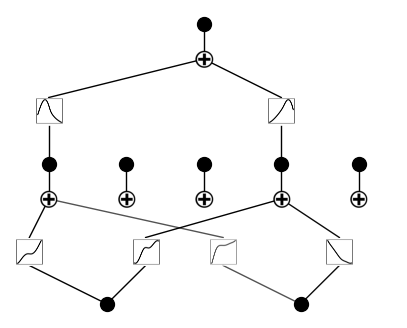

saving model version 0.4


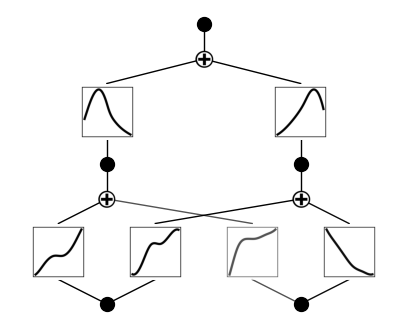

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


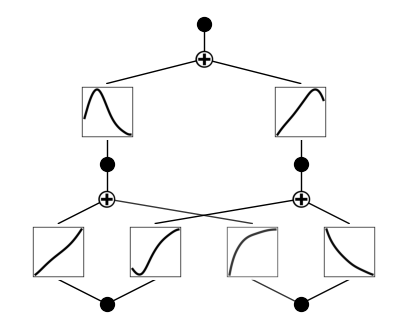

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.20e-02 | reg: 2.66e+00 | : 100%|█| 50/50 [00:23<00:00,  2.15it



saving model version 0.3
Pruning model...


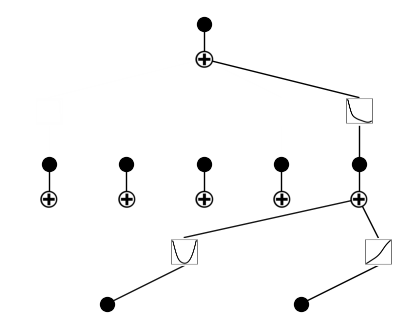

saving model version 0.4


checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


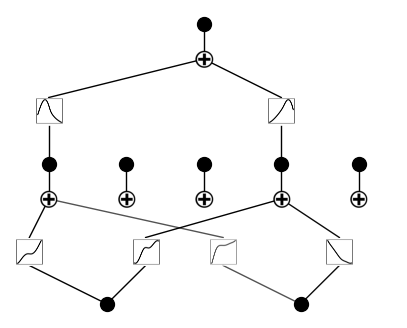

saving model version 0.4


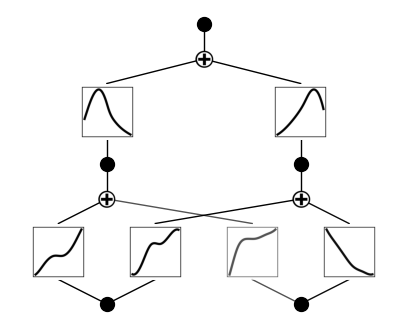

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


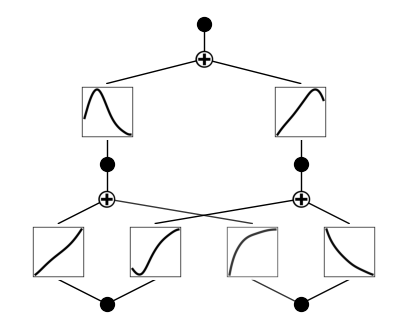

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.20e-02 | reg: 2.66e+00 | : 100%|█| 50/50 [00:23<00:00,  2.15it



saving model version 0.3
Pruning model...


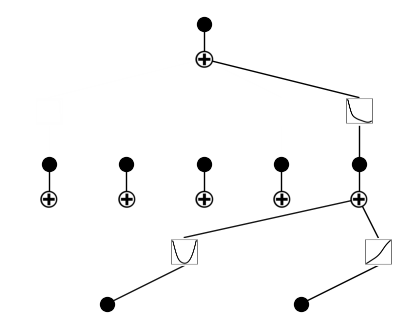

saving model version 0.4


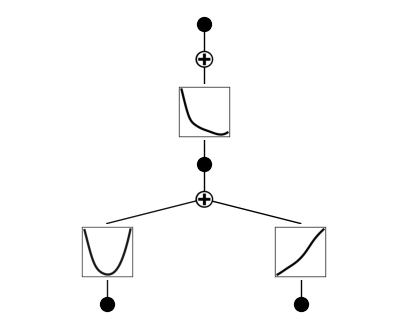

| train_loss: 7.81e-02 | test_loss: 7.83e-02 | reg: 3.64e+00 | : 100%|█| 20/20 [00:04<00:00,  4.56it



checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


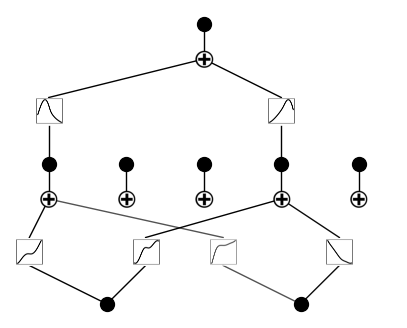

saving model version 0.4


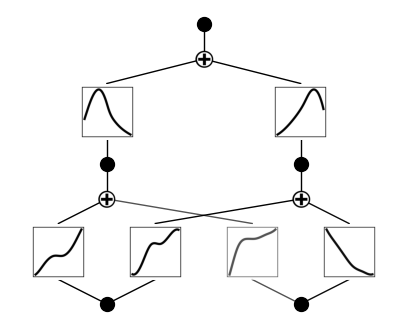

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


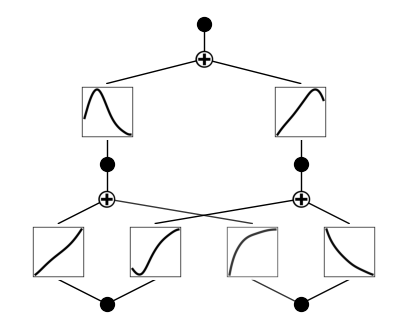

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.20e-02 | reg: 2.66e+00 | : 100%|█| 50/50 [00:23<00:00,  2.15it



saving model version 0.3
Pruning model...


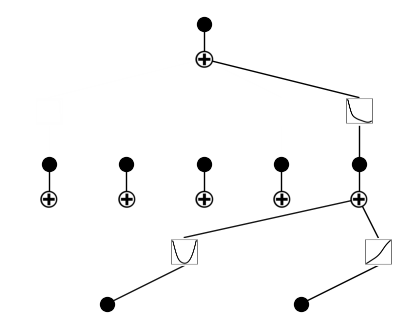

saving model version 0.4


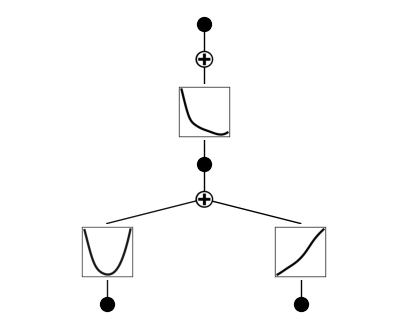

| train_loss: 7.81e-02 | test_loss: 7.83e-02 | reg: 3.64e+00 | : 100%|█| 20/20 [00:04<00:00,  4.56it



saving model version 0.5


checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.95e-02 | test_loss: 2.04e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.02e-02 | reg: 5.55e+00 | : 100%|█| 50/50 [00:22<00:00,  2.22it



saving model version 0.3
Pruning model...


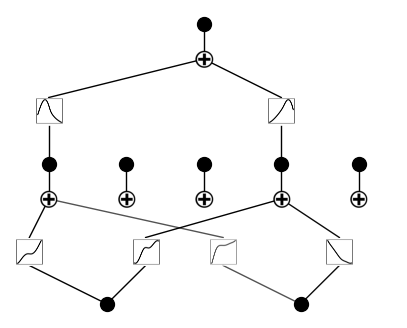

saving model version 0.4


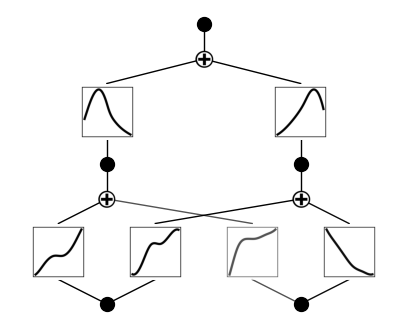

| train_loss: 1.95e-03 | test_loss: 2.02e-03 | reg: 7.95e+00 | : 100%|█| 20/20 [00:06<00:00,  3.15it



saving model version 0.5


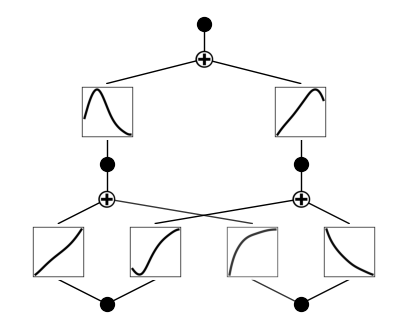

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.18e-02 | test_loss: 2.43e-02 | reg: 2.72e+00 | : 100%|█| 50/50 [00:21<00:00,  2.28it



saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.88e-02 | test_loss: 2.20e-02 | reg: 2.66e+00 | : 100%|█| 50/50 [00:23<00:00,  2.15it



saving model version 0.3
Pruning model...


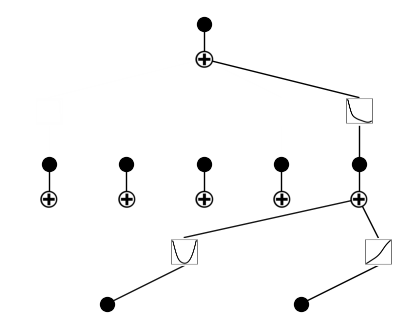

saving model version 0.4


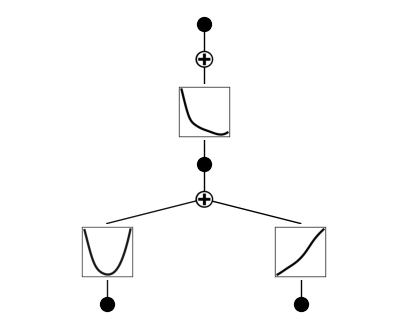

| train_loss: 7.81e-02 | test_loss: 7.83e-02 | reg: 3.64e+00 | : 100%|█| 20/20 [00:04<00:00,  4.56it



saving model version 0.5


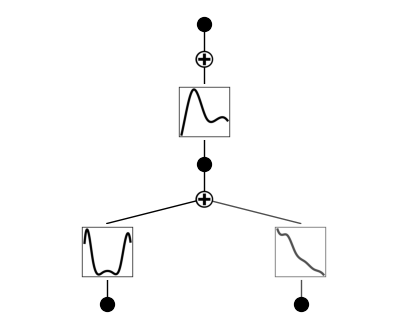

In [52]:
results = feynman_pruned_kan_experiment(dataset='I.6.20', samples=1000, seeds=[1,2], grids=[3,5], steps_per_grid=50, steps_after_prune=20, depths=[3], lamb=1e-3)

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.11e-01 | test_loss: 1.10e-01 | reg: 4.76e-04 | : 100%|█| 50/50 [00:05<00:00,  9.25it


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.11e-01 | test_loss: 1.10e-01 | reg: 6.46e-05 | : 100%|█| 50/50 [00:02<00:00, 16.77it


saving model version 0.3
Pruning model...
saving model version 0.4


| train_loss: 3.27e-01 | test_loss: 3.28e-01 | reg: 0.00e+00 | : 100%|█| 20/20 [00:00<00:00, 71.29it


saving model version 0.5


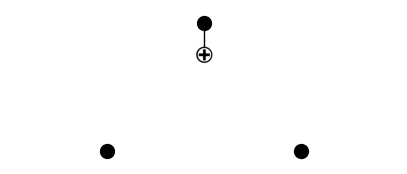

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.13e-01 | test_loss: 1.13e-01 | reg: 6.70e-04 | : 100%|█| 50/50 [00:05<00:00,  9.80it


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.13e-01 | test_loss: 1.13e-01 | reg: 1.16e-04 | : 100%|█| 50/50 [00:04<00:00, 11.87it


saving model version 0.3
Pruning model...
saving model version 0.4


| train_loss: 3.29e-01 | test_loss: 3.25e-01 | reg: 0.00e+00 | : 100%|█| 20/20 [00:00<00:00, 65.38it


saving model version 0.5


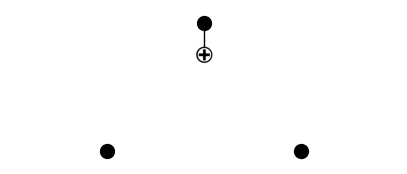

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.11e-01 | test_loss: 1.10e-01 | reg: 2.60e-01 | : 100%|█| 50/50 [00:20<00:00,  2.41it


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.11e-01 | test_loss: 1.10e-01 | reg: 1.50e-01 | : 100%|█| 50/50 [00:17<00:00,  2.87it


saving model version 0.3
Pruning model...
saving model version 0.4


| train_loss: 1.11e-01 | test_loss: 1.10e-01 | reg: 1.25e-01 | : 100%|█| 20/20 [00:07<00:00,  2.68it


saving model version 0.5


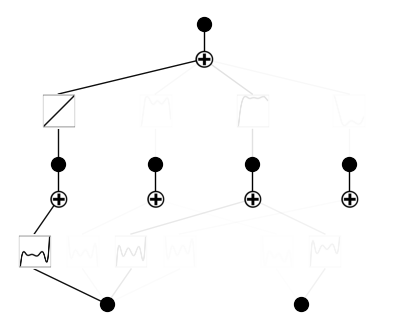

checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.13e-01 | test_loss: 1.13e-01 | reg: 2.26e-01 | : 100%|█| 50/50 [00:21<00:00,  2.30it


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.13e-01 | test_loss: 1.13e-01 | reg: 1.75e-01 | : 100%|█| 50/50 [00:23<00:00,  2.10it


saving model version 0.3
Pruning model...
saving model version 0.4


| train_loss: 1.13e-01 | test_loss: 1.13e-01 | reg: 5.28e-03 | : 100%|█| 20/20 [00:07<00:00,  2.79it


saving model version 0.5


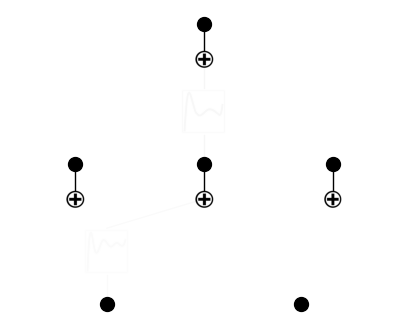

In [28]:
results2 = feynman_pruned_kan_experiment(dataset='I.6.20', samples=1000, seeds=[1,2], grids=[3,5], steps_per_grid=200, steps_after_prune=200, depths=[2,3])